In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
'''plt.style.use("seaborn")'''
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
seed = 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Minor project/final_porous_carbon_dataset.csv")
df

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),IDIGratio,N (at. %),Current density,O (at. %),Capacitance
0,porous carbon,graphene,KOH,1.00,2273.00,2.74,4.47,0.32,215.00,3.50,0.00,2.73,0.00,23.34
1,porous carbon,graphene,H2SO4,1.20,2532.00,2.38,3.22,0.23,533.00,3.75,0.00,2.80,5.00,19.39
2,porous carbon,graphene,NET4BF4 (Tetraethylamoniumterafluroborate),2.70,1522.00,2.02,1.96,0.14,467.00,3.58,0.00,2.87,5.00,16.19
3,porous carbon,graphene,H2SO4,0.90,710.00,2.36,0.71,0.12,981.00,3.41,0.00,2.94,5.00,15.13
4,porous carbon,graphene,H2SO4,0.90,698.00,2.69,0.82,0.09,1052.00,3.24,0.00,3.01,12.00,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),3.84,2753.47,0.16,6.07,1.03,927.22,NaN,2.47,2.17,7.02,60.43
817,porous carbon,not available,KOH,0.77,3024.78,3.59,2.75,0.19,418.26,NaN,7.83,2.24,0.92,59.65
818,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),1.41,1227.96,4.52,11.99,1.74,583.72,NaN,5.49,2.31,3.04,58.86
819,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),1.57,2963.41,4.70,15.52,0.91,32.11,NaN,9.72,2.38,9.11,58.34


In [ ]:
print(df.columns)

Index(['Materials-1', 'Materials-2', 'Electrolyte', 'Voltage window (V)',
       'Specific surface area (m2/g)', 'Pore volume (cm3/g)', 'Pore size (nm)',
       'Micropore volume (cm3/g)', 'SSA of micropores (m2/g)', 'IDIGratio',
       'N (at. %)', 'Current density', 'O (at. %)', 'Capacitance'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Materials-1                   821 non-null    object 
 1   Materials-2                   821 non-null    object 
 2   Electrolyte                   821 non-null    object 
 3   Voltage window (V)            821 non-null    float64
 4   Specific surface area (m2/g)  821 non-null    float64
 5   Pore volume (cm3/g)           821 non-null    float64
 6   Pore size (nm)                821 non-null    float64
 7   Micropore volume (cm3/g)      821 non-null    float64
 8   SSA of micropores (m2/g)      821 non-null    float64
 9   IDIGratio                     369 non-null    float64
 10  N (at. %)                     821 non-null    float64
 11  Current density               821 non-null    float64
 12  O (at. %)                     821 non-null    float64
 13  Capac

In [ ]:
df.isnull()

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),IDIGratio,N (at. %),Current density,O (at. %),Capacitance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,False,False,False,False,False,False,False,False,False,True,False,False,False,False
817,False,False,False,False,False,False,False,False,False,True,False,False,False,False
818,False,False,False,False,False,False,False,False,False,True,False,False,False,False
819,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Materials-1,0
Materials-2,0
Electrolyte,0
Voltage window (V),0
Specific surface area (m2/g),0
Pore volume (cm3/g),0
Pore size (nm),0
Micropore volume (cm3/g),0
SSA of micropores (m2/g),0
IDIGratio,452


In [ ]:
df.isnull().sum().sum()

452

In [ ]:
df.drop("IDIGratio", axis='columns', inplace= True)
df

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %),Capacitance
0,porous carbon,graphene,KOH,1.00,2273.00,2.74,4.47,0.32,215.00,0.00,2.73,0.00,23.34
1,porous carbon,graphene,H2SO4,1.20,2532.00,2.38,3.22,0.23,533.00,0.00,2.80,5.00,19.39
2,porous carbon,graphene,NET4BF4 (Tetraethylamoniumterafluroborate),2.70,1522.00,2.02,1.96,0.14,467.00,0.00,2.87,5.00,16.19
3,porous carbon,graphene,H2SO4,0.90,710.00,2.36,0.71,0.12,981.00,0.00,2.94,5.00,15.13
4,porous carbon,graphene,H2SO4,0.90,698.00,2.69,0.82,0.09,1052.00,0.00,3.01,12.00,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),3.84,2753.47,0.16,6.07,1.03,927.22,2.47,2.17,7.02,60.43
817,porous carbon,not available,KOH,0.77,3024.78,3.59,2.75,0.19,418.26,7.83,2.24,0.92,59.65
818,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),1.41,1227.96,4.52,11.99,1.74,583.72,5.49,2.31,3.04,58.86
819,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),1.57,2963.41,4.70,15.52,0.91,32.11,9.72,2.38,9.11,58.34


In [ ]:
df2 = df.fillna(value = 0)
df2

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %),Capacitance
0,porous carbon,graphene,KOH,1.00,2273.00,2.74,4.47,0.32,215.00,0.00,2.73,0.00,23.34
1,porous carbon,graphene,H2SO4,1.20,2532.00,2.38,3.22,0.23,533.00,0.00,2.80,5.00,19.39
2,porous carbon,graphene,NET4BF4 (Tetraethylamoniumterafluroborate),2.70,1522.00,2.02,1.96,0.14,467.00,0.00,2.87,5.00,16.19
3,porous carbon,graphene,H2SO4,0.90,710.00,2.36,0.71,0.12,981.00,0.00,2.94,5.00,15.13
4,porous carbon,graphene,H2SO4,0.90,698.00,2.69,0.82,0.09,1052.00,0.00,3.01,12.00,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),3.84,2753.47,0.16,6.07,1.03,927.22,2.47,2.17,7.02,60.43
817,porous carbon,not available,KOH,0.77,3024.78,3.59,2.75,0.19,418.26,7.83,2.24,0.92,59.65
818,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),1.41,1227.96,4.52,11.99,1.74,583.72,5.49,2.31,3.04,58.86
819,porous carbon,not available,NET4BF4 (Tetraethylamoniumterafluroborate),1.57,2963.41,4.70,15.52,0.91,32.11,9.72,2.38,9.11,58.34


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Materials-1                   821 non-null    object 
 1   Materials-2                   821 non-null    object 
 2   Electrolyte                   821 non-null    object 
 3   Voltage window (V)            821 non-null    float64
 4   Specific surface area (m2/g)  821 non-null    float64
 5   Pore volume (cm3/g)           821 non-null    float64
 6   Pore size (nm)                821 non-null    float64
 7   Micropore volume (cm3/g)      821 non-null    float64
 8   SSA of micropores (m2/g)      821 non-null    float64
 9   N (at. %)                     821 non-null    float64
 10  Current density               821 non-null    float64
 11  O (at. %)                     821 non-null    float64
 12  Capacitance                   821 non-null    float64
dtypes: fl

In [ ]:
df2.describe()

,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %),Capacitance
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,1.785981,1568.310536,2.119026,9.230183,0.766322,580.784458,3.651279,7.538382,6.867917,157.024791
std,1.022230,1110.138451,1.687281,8.403368,0.564546,362.261185,3.185770,6.746111,5.006980,135.763545
min,0.600000,0.190000,0.010000,0.460000,0.000000,0.490000,0.000000,-12.280000,0.000000,1.900000
25%,1.000000,706.130000,0.700000,2.200000,0.290000,300.260000,0.880000,2.500000,3.560000,49.630000
50%,1.270000,1372.750000,1.560000,5.620000,0.610000,545.460000,2.780000,5.885200,6.340000,112.000000
75%,2.670000,2315.400000,3.370000,16.300000,1.170000,809.920000,6.100000,11.850000,8.690000,241.000000
max,4.000000,15917.000000,5.910000,33.300000,2.000000,2131.000000,19.800000,29.950000,33.800000,550.000000


In [ ]:
df2.head()

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %),Capacitance
0,porous carbon,graphene,KOH,1.0,2273.0,2.74,4.47,0.32,215.0,0.0,2.73,0.0,23.34
1,porous carbon,graphene,H2SO4,1.2,2532.0,2.38,3.22,0.23,533.0,0.0,2.80,5.0,19.39
2,porous carbon,graphene,NET4BF4 (Tetraethylamoniumterafluroborate),2.7,1522.0,2.02,1.96,0.14,467.0,0.0,2.87,5.0,16.19
3,porous carbon,graphene,H2SO4,0.9,710.0,2.36,0.71,0.12,981.0,0.0,2.94,5.0,15.13
4,porous carbon,graphene,H2SO4,0.9,698.0,2.69,0.82,0.09,1052.0,0.0,3.01,12.0,14.73


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Voltage window (V),821.0,1.785981,1.022230,0.60,1.00,1.2700,2.67,4.00
Specific surface area (m2/g),821.0,1568.310536,1110.138451,0.19,706.13,1372.7500,2315.40,15917.00
Pore volume (cm3/g),821.0,2.119026,1.687281,0.01,0.70,1.5600,3.37,5.91
Pore size (nm),821.0,9.230183,8.403368,0.46,2.20,5.6200,16.30,33.30
Micropore volume (cm3/g),821.0,0.766322,0.564546,0.00,0.29,0.6100,1.17,2.00
SSA of micropores (m2/g),821.0,580.784458,362.261185,0.49,300.26,545.4600,809.92,2131.00
N (at. %),821.0,3.651279,3.185770,0.00,0.88,2.7800,6.10,19.80
Current density,821.0,7.538382,6.746111,-12.28,2.50,5.8852,11.85,29.95
O (at. %),821.0,6.867917,5.006980,0.00,3.56,6.3400,8.69,33.80
Capacitance,821.0,157.024791,135.763545,1.90,49.63,112.0000,241.00,550.00


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns
df2['Materials-1']= label_encoder.fit_transform(df2['Materials-1'])
df2['Materials-2']= label_encoder.fit_transform(df2['Materials-2'])
df2['Electrolyte']= label_encoder.fit_transform(df2['Electrolyte'])
df2['Materials-1'].unique(),df2['Materials-2'].unique(),df2['Electrolyte'].unique()

(array([4, 5, 1, 0, 3, 2]),
 array([ 6,  2,  8,  7, 11, 12, 10, 14,  5,  9, 13,  1,  0,  3,  4]),
 array([ 9,  7, 13, 12, 10, 14,  8,  6, 17,  5,  0,  3, 16, 18, 19,  2, 15,
        11,  1,  4]))

In [ ]:
X = df2.drop(['Capacitance'],axis = 1)
X

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %)
0,4,6,9,1.00,2273.00,2.74,4.47,0.32,215.00,0.00,2.73,0.00
1,4,6,7,1.20,2532.00,2.38,3.22,0.23,533.00,0.00,2.80,5.00
2,4,6,13,2.70,1522.00,2.02,1.96,0.14,467.00,0.00,2.87,5.00
3,4,6,7,0.90,710.00,2.36,0.71,0.12,981.00,0.00,2.94,5.00
4,4,6,7,0.90,698.00,2.69,0.82,0.09,1052.00,0.00,3.01,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...
816,4,9,13,3.84,2753.47,0.16,6.07,1.03,927.22,2.47,2.17,7.02
817,4,9,9,0.77,3024.78,3.59,2.75,0.19,418.26,7.83,2.24,0.92
818,4,9,13,1.41,1227.96,4.52,11.99,1.74,583.72,5.49,2.31,3.04
819,4,9,13,1.57,2963.41,4.70,15.52,0.91,32.11,9.72,2.38,9.11


In [ ]:
Y = df2.Capacitance
Y

,Capacitance
0,23.34
1,19.39
2,16.19
3,15.13
4,14.73
...,...
816,60.43
817,59.65
818,58.86
819,58.34


In [ ]:
X.shape

(821, 12)

In [ ]:
Y.shape

(821,)

In [ ]:
'''# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns
X['Material 1']= label_encoder.fit_transform(X['Material 1'])
X['Material 2']= label_encoder.fit_transform(X['Material 2'])
X['Electrolyte']= label_encoder.fit_transform(X['Electrolyte'])
X['Electrode Configuration']= label_encoder.fit_transform(X['Electrode Configuration'])
X['Material 1'].unique(),X['Material 2'].unique(),X['Electrode Configuration'].unique(),X['Electrolyte'].unique()'''

"# Import label encoder\nfrom sklearn import preprocessing\n\n# label_encoder object knows\nlabel_encoder = preprocessing.LabelEncoder()\n\n# Encode labels in columns\nX['Material 1']= label_encoder.fit_transform(X['Material 1'])\nX['Material 2']= label_encoder.fit_transform(X['Material 2'])\nX['Electrolyte']= label_encoder.fit_transform(X['Electrolyte'])\nX['Electrode Configuration']= label_encoder.fit_transform(X['Electrode Configuration'])\nX['Material 1'].unique(),X['Material 2'].unique(),X['Electrode Configuration'].unique(),X['Electrolyte'].unique()"

In [ ]:
corr=df2.corr()
corr

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %),Capacitance
Materials-1,1.000000,-0.281274,-0.027403,0.141703,-0.023554,0.113897,0.142466,0.022250,-0.025929,-0.076823,0.056030,-0.192499,-0.067423
Materials-2,-0.281274,1.000000,0.061097,-0.062087,0.068107,-0.075838,-0.158485,-0.033829,0.105017,-0.133409,-0.140568,0.074300,0.046375
Electrolyte,-0.027403,0.061097,1.000000,0.009598,-0.067065,-0.025924,-0.117422,-0.040541,-0.060667,-0.077493,-0.032241,0.004711,-0.033462
Voltage window (V),0.141703,-0.062087,0.009598,1.000000,0.111730,0.222768,0.327636,0.228635,-0.149401,0.135239,-0.029149,-0.239875,-0.006615
Specific surface area (m2/g),-0.023554,0.068107,-0.067065,0.111730,1.000000,0.228572,0.138688,0.198876,0.079533,0.070601,-0.112724,-0.054043,0.030175
Pore volume (cm3/g),0.113897,-0.075838,-0.025924,0.222768,0.228572,1.000000,0.330281,0.351748,-0.178873,0.219863,-0.055019,-0.227073,0.018507
Pore size (nm),0.142466,-0.158485,-0.117422,0.327636,0.138688,0.330281,1.000000,0.321109,-0.161372,0.356023,-0.028199,-0.282638,-0.015696
Micropore volume (cm3/g),0.022250,-0.033829,-0.040541,0.228635,0.198876,0.351748,0.321109,1.000000,-0.155423,0.212752,-0.092109,-0.176713,0.027700
SSA of micropores (m2/g),-0.025929,0.105017,-0.060667,-0.149401,0.079533,-0.178873,-0.161372,-0.155423,1.000000,-0.231293,0.124503,0.397676,0.021418
N (at. %),-0.076823,-0.133409,-0.077493,0.135239,0.070601,0.219863,0.356023,0.212752,-0.231293,1.000000,-0.040083,-0.127140,-0.011411


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %),Capacitance
Materials-1,1.000000,-0.281274,-0.027403,0.141703,-0.023554,0.113897,0.142466,0.022250,-0.025929,-0.076823,0.056030,-0.192499,-0.067423
Materials-2,-0.281274,1.000000,0.061097,-0.062087,0.068107,-0.075838,-0.158485,-0.033829,0.105017,-0.133409,-0.140568,0.074300,0.046375
Electrolyte,-0.027403,0.061097,1.000000,0.009598,-0.067065,-0.025924,-0.117422,-0.040541,-0.060667,-0.077493,-0.032241,0.004711,-0.033462
Voltage window (V),0.141703,-0.062087,0.009598,1.000000,0.111730,0.222768,0.327636,0.228635,-0.149401,0.135239,-0.029149,-0.239875,-0.006615
Specific surface area (m2/g),-0.023554,0.068107,-0.067065,0.111730,1.000000,0.228572,0.138688,0.198876,0.079533,0.070601,-0.112724,-0.054043,0.030175
Pore volume (cm3/g),0.113897,-0.075838,-0.025924,0.222768,0.228572,1.000000,0.330281,0.351748,-0.178873,0.219863,-0.055019,-0.227073,0.018507
Pore size (nm),0.142466,-0.158485,-0.117422,0.327636,0.138688,0.330281,1.000000,0.321109,-0.161372,0.356023,-0.028199,-0.282638,-0.015696
Micropore volume (cm3/g),0.022250,-0.033829,-0.040541,0.228635,0.198876,0.351748,0.321109,1.000000,-0.155423,0.212752,-0.092109,-0.176713,0.027700
SSA of micropores (m2/g),-0.025929,0.105017,-0.060667,-0.149401,0.079533,-0.178873,-0.161372,-0.155423,1.000000,-0.231293,0.124503,0.397676,0.021418
N (at. %),-0.076823,-0.133409,-0.077493,0.135239,0.070601,0.219863,0.356023,0.212752,-0.231293,1.000000,-0.040083,-0.127140,-0.011411


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(656, 12) (165, 12) (656,) (165,)


In [ ]:
X_train

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %)
372,4,12,4,3.39,1880.25,3.41,4.53,1.36,601.89,4.81,12.9000,3.43
48,4,6,6,2.70,1330.00,1.35,4.05,0.46,981.00,1.56,6.1600,1.32
818,4,9,13,1.41,1227.96,4.52,11.99,1.74,583.72,5.49,2.3100,3.04
771,4,2,7,2.98,1122.84,2.34,17.97,1.70,111.80,8.73,11.7800,6.96
753,4,6,7,3.44,2718.41,4.07,5.69,0.77,595.69,7.91,4.7700,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...
763,4,6,13,1.31,1566.81,2.53,6.86,1.83,871.43,8.36,8.6670,5.96
192,2,12,7,0.90,2575.66,1.57,2.50,0.64,1167.29,0.81,2.2100,7.00
629,4,6,9,1.57,113.87,2.95,9.79,0.37,614.14,3.11,4.4180,9.67
559,4,6,4,3.90,2676.22,1.76,19.98,0.07,511.56,3.29,1.1280,0.59


In [ ]:
Y_train

,Capacitance
372,351.38
48,32.46
818,58.86
771,14.15
753,17.51
...,...
763,15.68
192,34.00
629,75.11
559,397.17


In [ ]:
X_test

,Materials-1,Materials-2,Electrolyte,Voltage window (V),Specific surface area (m2/g),Pore volume (cm3/g),Pore size (nm),Micropore volume (cm3/g),SSA of micropores (m2/g),N (at. %),Current density,O (at. %)
657,4,2,13,1.01,1203.81,4.50,6.42,1.69,941.12,6.73,1.3829,0.71
701,4,6,7,2.22,3312.62,0.72,26.91,1.21,547.01,2.31,5.6352,1.23
482,4,9,4,3.60,2990.39,4.27,25.42,1.44,909.68,7.49,-2.8450,2.77
513,4,6,13,2.09,170.01,3.43,25.24,0.32,632.02,3.03,4.2160,5.73
103,4,8,9,1.20,2857.00,1.44,3.80,1.11,547.94,0.19,0.5000,7.47
...,...,...,...,...,...,...,...,...,...,...,...,...
49,4,6,6,2.70,1234.00,0.93,3.01,0.45,1052.00,1.43,6.2300,1.29
661,4,2,4,1.51,2269.43,4.19,10.03,0.65,798.71,5.25,1.8834,4.19
299,4,2,9,1.00,861.00,0.68,1.85,0.27,601.64,2.39,1.9500,11.27
116,4,12,9,1.20,745.00,0.83,1.00,0.23,301.44,0.12,3.7500,6.17


In [ ]:
Y_test

,Capacitance
657,68.330000
701,61.770000
482,60.690000
513,287.190000
103,192.974132
...,...
49,32.280000
661,67.650000
299,223.710000
116,146.538570


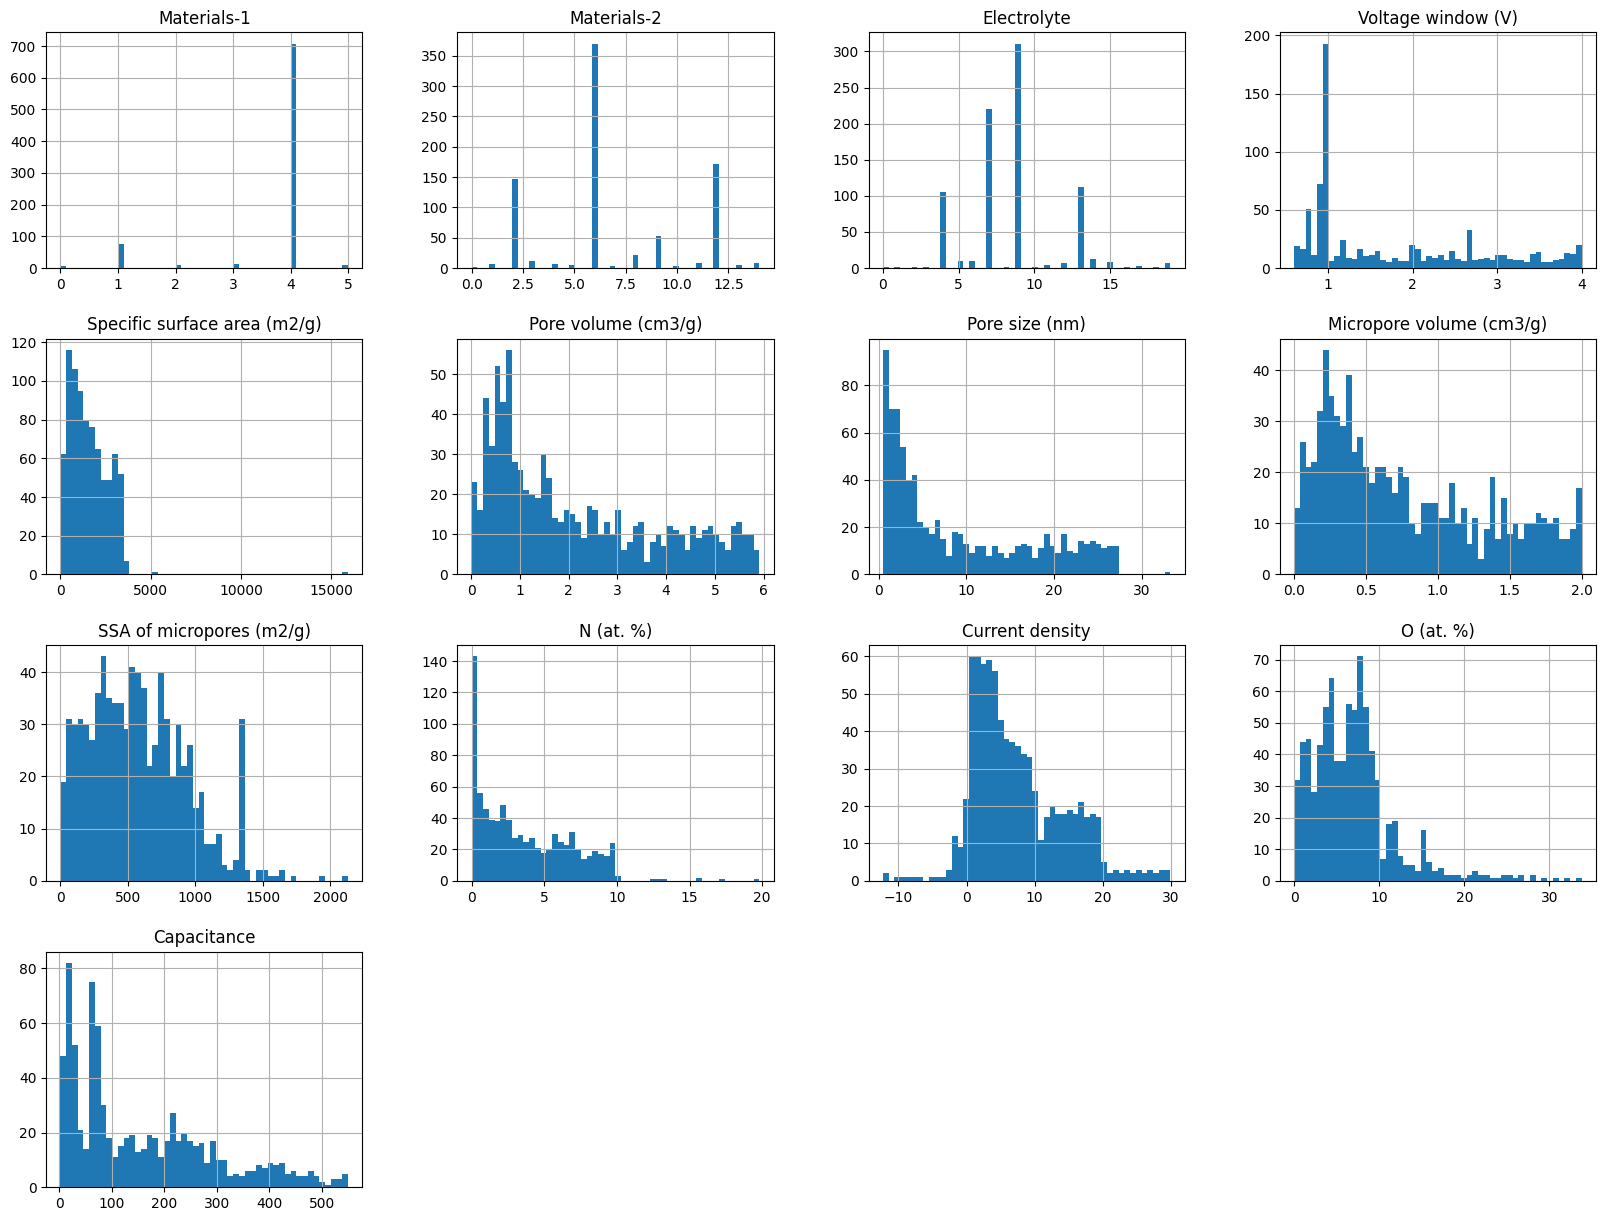

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.savefig('figrfr1.png')
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test)*100)

7.820387393333839


In [ ]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = seed)
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)
print(regressor.score(X_test,Y_test)*-100)

10.9669006188295


In [ ]:
'''from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))'''

"from sklearn.neural_network import MLPClassifier\nclf = MLPClassifier(solver='lbfgs', alpha=1e-5,\n                    hidden_layer_sizes=(5, 2), random_state=1)\nclf.fit(X_train, Y_train)\nprint(clf.score(X_test, Y_test))"

In [ ]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
print(Y_train_pred)

[295.90849105  35.3505      68.3218      63.7954      34.0343
 177.5113     215.95183362 349.19056551 260.60474496  25.0064
 118.5499      30.1145      74.0883      63.8963469   60.24322689
 253.28006    137.2927      96.12963053 139.86906591  54.97152618
  87.2441      44.8487     141.98747608  15.4915     247.78122606
 232.902009    71.1784     158.38556799 191.36970143  74.7455
 154.4656     216.87379538 350.799      188.00869247 177.43
  78.6451      59.3426     322.46656     93.29714846 232.38801599
 320.012      174.2132      70.2459     106.9426     147.6893
 307.0675      31.4313      85.82312212 395.50283399 167.7553
 332.8915     176.41852323  81.93542212  84.83832709  78.7881
 235.3631873   38.8421     274.47523527 340.16946    105.69379279
  55.8195      56.83101369 277.95799889  33.1542      85.0291
 179.4343      28.2782043  278.23599372 117.362      190.3313
 133.54943896 300.47202986  49.04073232 226.58834657 118.2311
 122.5025107  182.9927     105.2311     266.81819981

In [ ]:
predictions1

,Y_train,Y_train_pred
372,351.38,295.908491
48,32.46,35.350500
818,58.86,68.321800
771,14.15,63.795400
753,17.51,34.034300
...,...,...
763,15.68,73.206988
192,34.00,39.450100
629,75.11,66.061600
559,397.17,313.409700


In [ ]:
len(Y_train_pred)

656

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The training r_sq is: 0.9001
The MAE is: 29.6035
The RMSE is: 43.2031
The EVS is: 0.9001


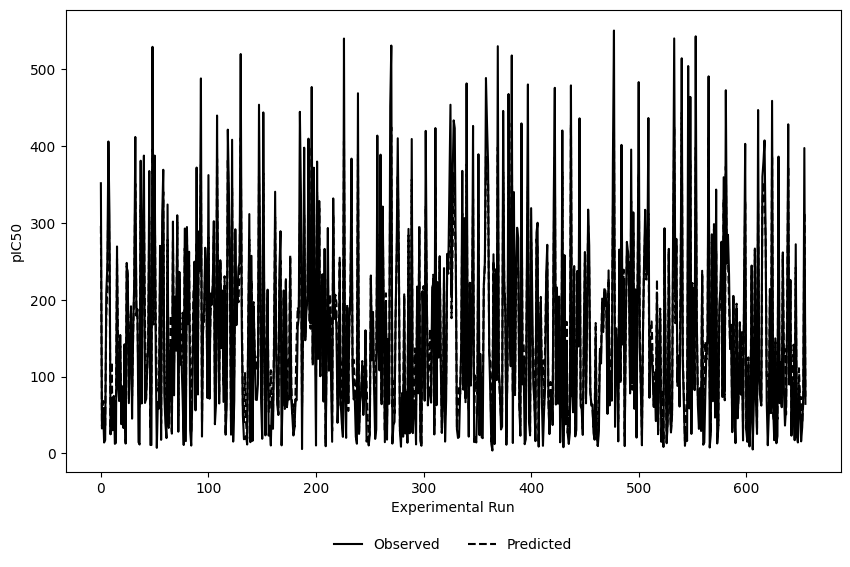

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pIC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([204.45872212,  58.00974154, 269.43818   ,  62.4291    ,
       148.23708581,  19.03333047,  15.3468    , 223.24707505,
       153.28205818,  59.1144    , 254.12222   , 236.36418184,
        44.56339105, 105.81395104,  97.58430491, 127.624     ,
       194.5315    , 281.8681578 , 100.64760122,  42.64232591,
       271.65731548, 279.53083928, 228.24151332, 205.2594    ,
        80.87242049, 123.5051    ,  48.09975103, 186.0206258 ,
       231.67105817,  70.32837237,  29.3628    , 283.73577135,
       212.93985555, 220.21906523, 187.37551184, 239.0435758 ,
       183.9598    , 239.80783841, 138.27912   , 177.19869084,
        77.68494571, 290.98199409,  77.9422    , 195.7687    ,
       291.5387469 ,  28.0825    , 267.1703914 , 283.24584917,
       256.97684435, 206.33451053, 182.63912212, 146.02624812,
        71.6942    ,  45.87383047, 287.5554    , 260.34151551,
       136.20750254, 162.86350442,  60.34486585,  67.67240491,
       173.83454097,  44.2187    , 194.3854    ,  82.47

In [ ]:
len(Y_test_pred)

165

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
657,68.330000,204.458722
701,61.770000,58.009742
482,60.690000,269.438180
513,287.190000,62.429100
103,192.974132,148.237086
...,...,...
49,32.280000,34.749500
661,67.650000,164.965300
299,223.710000,211.320900
116,146.538570,133.061142


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.4132


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.4132


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 70.1039


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 100.8271


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.4135


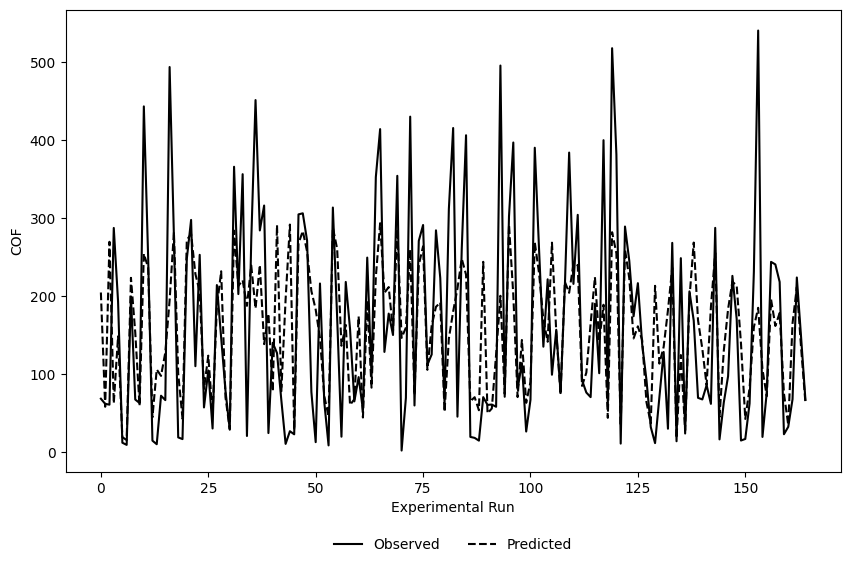

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('COF')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

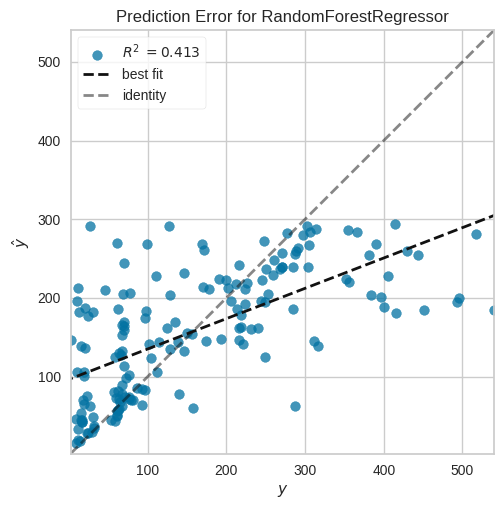

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

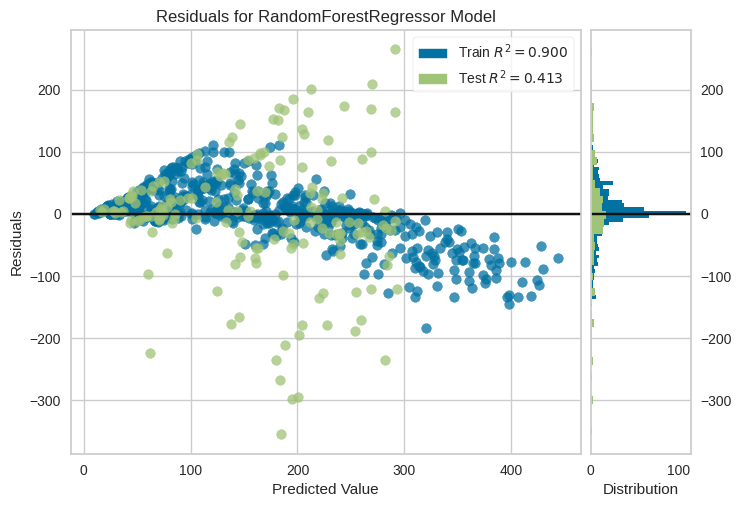

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

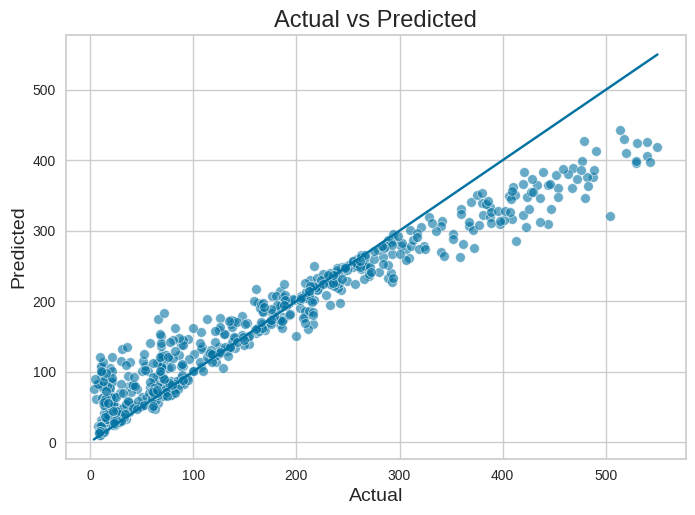

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_pred, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

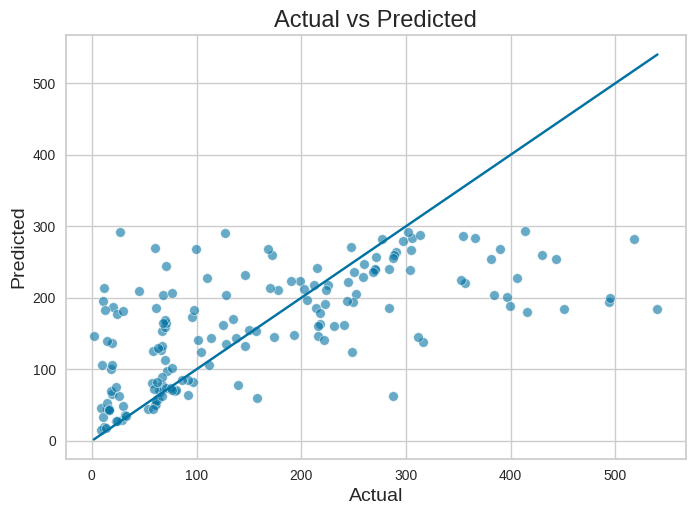

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.41320535187752505

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

100.83

In [ ]:
my_param_grid = {'n_estimators':[10, 100, 500], 'max_features':['sqrt', 'log2'], 'max_depth': [5,10,20]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.160 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.047 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.131 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.201 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.143 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.194 total time=   0.2s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.095 total time=   0.2s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.171 total time=   0.2s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.201 total time=   0.2s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.178 total time=  

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([128.38038727, 122.71747717, 244.385484  ,  80.91196057,
       175.99514565,  57.18025222,  50.79357907, 183.82750428,
       149.03722144,  82.46940996, 250.05627982, 246.41139332,
        53.71298979,  75.82024564, 114.20716185,  90.69308102,
       168.34123717, 257.41454593, 121.92054722,  83.22366301,
       279.50712917, 287.07152803, 234.16733585, 201.49730293,
        79.35193305, 147.58843893,  54.33855279, 169.80465185,
       165.57617574,  74.19332699,  59.75888829, 284.19415709,
       206.60120309, 211.2256229 , 157.70563246, 236.0162592 ,
       174.57509962, 213.29600979, 126.15378719, 157.39948381,
        72.21930626, 265.09592793,  92.25286191, 166.38952273,
       273.51971567,  51.42767084, 218.90640659, 258.6746861 ,
       257.9222685 , 171.90078188, 175.81066531, 168.39473292,
       103.69762902,  37.47702971, 231.61648629, 231.43328489,
       124.62335392, 172.84664645, 118.35709219, 105.93429655,
       147.95125808,  74.61115312, 201.04832901, 114.76

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
657,68.330000,204.458722,128.380387
701,61.770000,58.009742,122.717477
482,60.690000,269.438180,244.385484
513,287.190000,62.429100,80.911961
103,192.974132,148.237086,175.995146


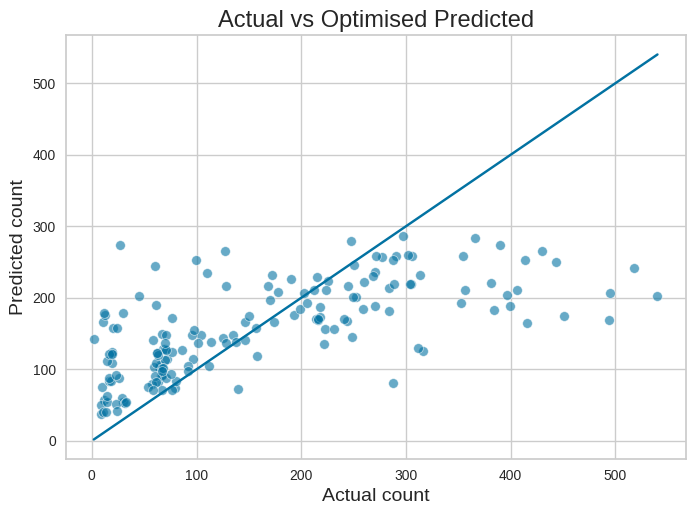

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.41714716975882393

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

100.49

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.8151


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 73.1788


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 100.4879


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.4182


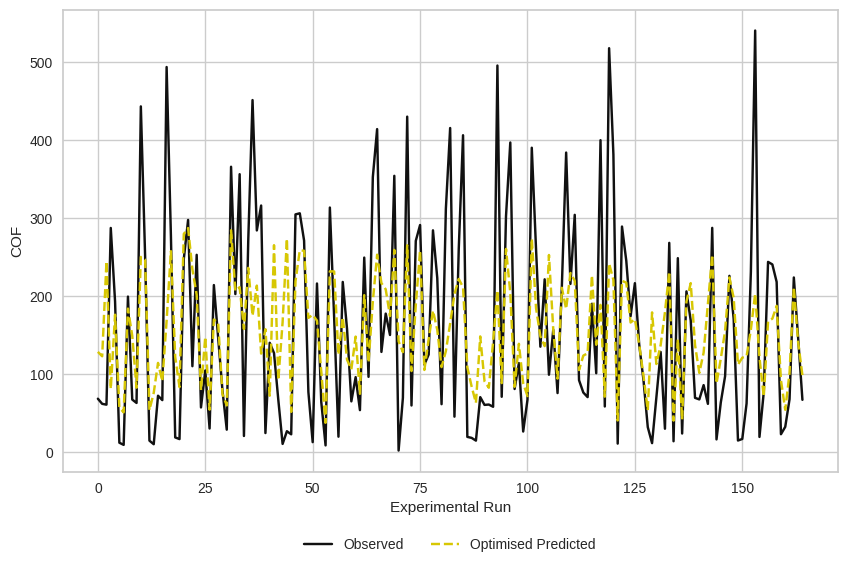

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'y', linestyle = '--')
plt.ylabel('COF')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([288.20280605,  44.82968084,  65.9491038 ,  39.31875517,
        45.80994086, 186.06261489, 222.44030245, 347.95752014,
       285.34534398,  25.62934593,  92.1131103 ,  35.02414207,
        84.8289975 ,  60.44603757,  66.01115689, 255.6856    ,
       149.53163327,  84.25394904, 142.15168034,  56.60633444,
       107.51562992,  52.09064435, 129.81967677,  22.45807906,
       246.21492889, 227.36593192,  86.11086948, 138.76961072,
       182.95586742,  59.95113748, 153.17834485, 216.70822337,
       326.178396  , 195.47862378, 172.90688487,  78.22598911,
        64.54921454, 310.40684197,  87.7653437 , 243.06236067,
       299.53343277, 146.78061094,  76.31153657, 116.73733259,
       158.0425025 , 306.99882214,  32.40913283,  63.29922082,
       405.07231444, 187.88887432, 318.42698   , 151.2869355 ,
        85.60384896,  88.69139133,  96.2661747 , 233.09746146,
        54.93052267, 276.51048727, 329.56127597, 106.56841418,
        62.39284053,  59.12673921, 264.53642888,  38.94

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
372,351.38,295.908491,288.202806
48,32.46,35.350500,44.829681
818,58.86,68.321800,65.949104
771,14.15,63.795400,39.318755
753,17.51,34.034300,45.809941


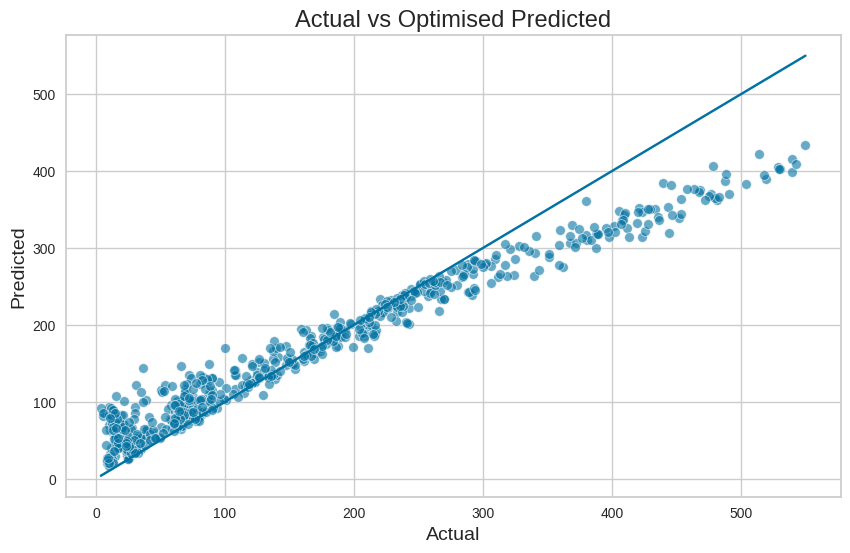

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.9824


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 30.2852


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 42.2305


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.9046


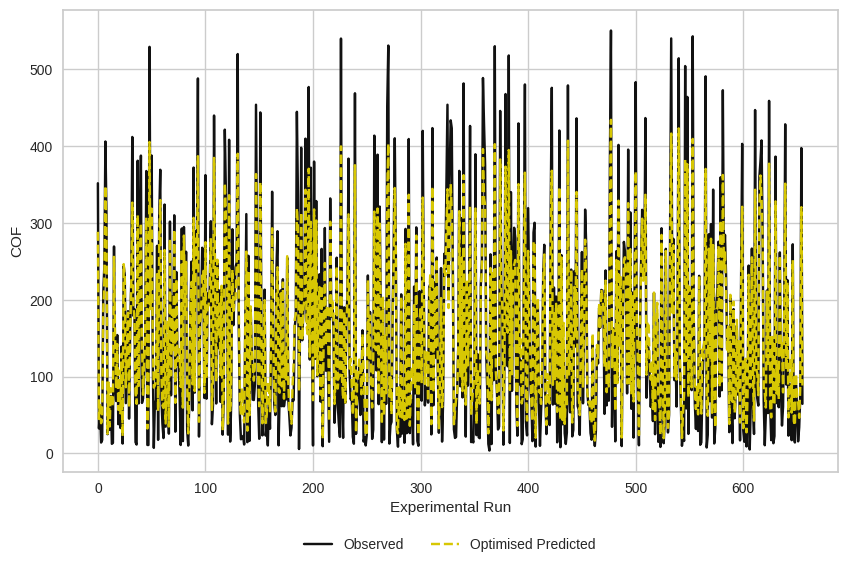

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'y', linestyle = '--')
plt.ylabel('COF')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

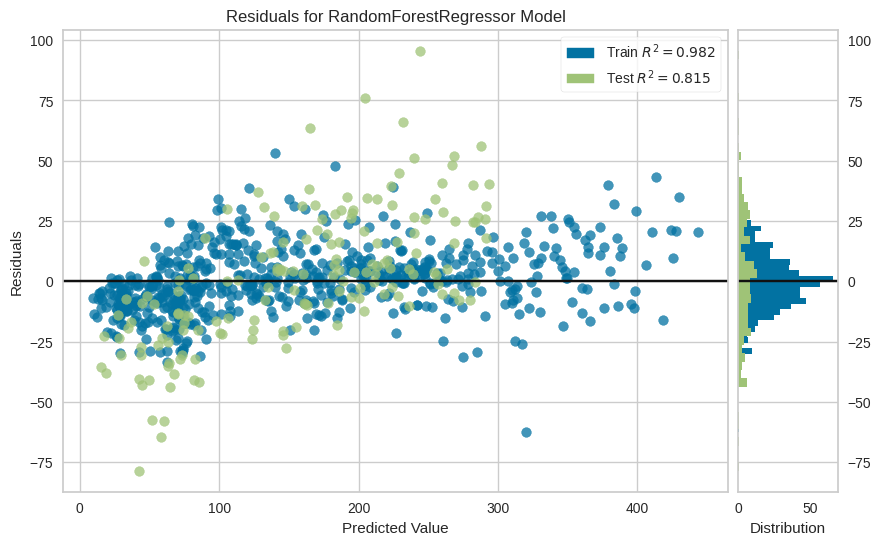

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()

In [ ]:
features = list(X_train.columns)

In [ ]:
features

['Materials-1',
 'Materials-2',
 'Electrolyte',
 'Voltage window (V)',
 'Specific surface area (m2/g)',
 'Pore volume (cm3/g)',
 'Pore size (nm)',
 'Micropore volume (cm3/g)',
 'SSA of micropores (m2/g)',
 'N (at. %)',
 'Current density',
 'O (at. %)']

In [ ]:
RFR = RandomForestRegressor(random_state=seed, n_estimators = 100, max_features='sqrt', max_depth=10)

In [ ]:
RFR.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=0)

In [ ]:
importance = RFR.feature_importances_
importance

array([0.01166968, 0.06328311, 0.02967408, 0.08795925, 0.06977136,
       0.08441147, 0.09686207, 0.09639342, 0.07435824, 0.06609879,
       0.22329883, 0.0962197 ])

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,Materials-1,0.011670
1,Materials-2,0.063283
2,Electrolyte,0.029674
3,Voltage window (V),0.087959
4,Specific surface area (m2/g),0.069771
5,Pore volume (cm3/g),0.084411
6,Pore size (nm),0.096862
7,Micropore volume (cm3/g),0.096393
8,SSA of micropores (m2/g),0.074358
9,N (at. %),0.066099


<Figure size 8000x4800 with 0 Axes>

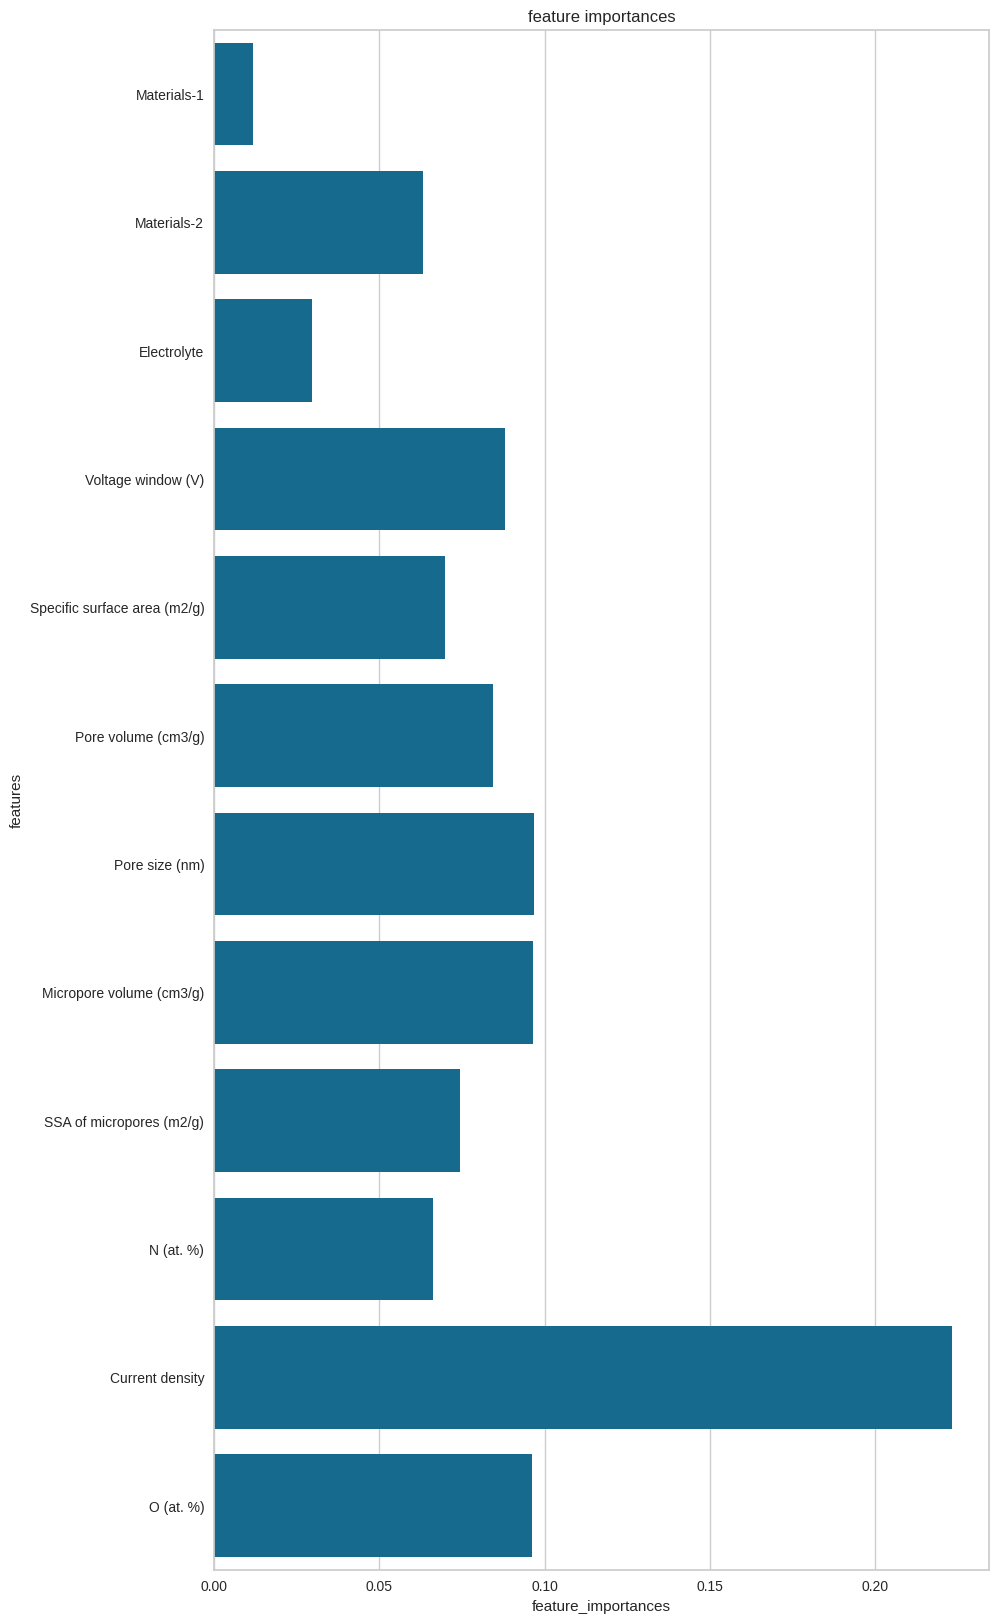

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.savefig('figrfr2.png')

plt.show()

In [ ]:
!pip install shap